# K-Means Clustering on User Behavior

11.6 接下来的工作

- spider: 用min maxin normalize each metrice
- bar

加入user profile后
- 每个count 转换为 ratio
- 用整个dataset的ratio整体做baseline参考

- credit_bucket: 用mean代替，转化为continuous；用lineplot 而不是 barplot


In [1]:
from sklearn.cluster import KMeans
import numpy as np

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from scipy import stats
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
%matplotlib inline

In [2]:
userengagement_df = pd.read_csv("../dataset/user_engagement.csv")
userengagement_df['session_start_timestamp'] = pd.to_datetime(userengagement_df['session_start_timestamp'])
#first_session['user_signup_timestamp'] = pd.to_datetime(first_session['user_signup_timestamp'])
#first_session['action_timestamp'] = pd.to_datetime(first_session['action_timestamp'])

In [221]:
# groupby id, apply agg func
engage_df = userengagement_df.groupby('user_id', as_index=False).aggregate({'session_length': 'mean',
                                                                            'logged_in_count': 'mean',
                                                                            'view_count': 'mean',
                                                                            'click_count': 'mean',
                                                                            })
# rename columns                                                                        
engage_df.columns = ['user_id', 'avg_session_length', 'avg_logged_in_count', 'avg_views_count', 'avg_clicks_count']

In [222]:
userengagement_df.shape

(1176858, 42)

In [223]:
engage_df.head()

,user_id,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
0,0000485dbdc19e76bedcaf155b4de9491f414a27,704.00000,2.00000,4.00000,0.00000
1,00008fb52ca81c6767db31f58ea37e7229c372e1,751.00000,0.00000,16.00000,6.00000
2,000091252c68230bd55a9abda98896c8610994bc,361.66667,0.83333,9.00000,12.16667
3,000091d428154729cbf338d4f51aa95af254d342,965.00000,1.00000,8.00000,6.50000
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,100.60000,0.80000,4.40000,4.80000


In [224]:
engage_df.describe()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,285141.00000,285141.00000,285141.00000,285141.00000
mean,375.37432,0.92981,5.38466,7.19840
std,1756.40053,0.45096,4.27515,8.98738
min,0.00000,0.00000,0.00000,0.00000
25%,160.20000,0.68182,3.00000,1.33333
50%,273.00000,1.00000,4.00000,4.78571
75%,452.00000,1.00000,6.66667,9.87500
max,784816.00000,26.00000,164.00000,290.00000


In [225]:
# drop user with avg session length >= 20,000s --- that's 5.5h
engage_df.loc[(engage_df['avg_session_length'] >= 20000), :]

,user_id,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
3874,037c0460cf2eb0bedb2573a3f258cf8a2bd85ca0,24543.74510,1.01961,2.66667,2.03922
7251,068200869677fae76484a13befdd8f7c9375e896,35264.33333,1.50000,5.16667,4.50000
9239,0851d509ec6470188b518d506525575c75cbb63e,21929.82353,1.35294,6.88235,6.41176
9630,08a87f03c38a3aec6b9412c4b9516c5046035096,24406.85714,1.07143,8.42857,8.14286
11456,0a4614fe4dfb6ef05637232daedafef0ee2b2217,165408.50000,1.00000,10.00000,8.00000
13839,0c61489c2f50ce9aa3ea7af66792f55b8cd947e9,139347.22222,0.88889,3.88889,3.33333
15002,0d6ee707fb746c8a46206a1c57636899cd10e116,28282.00000,1.00000,3.23077,3.15385
17411,0f8e53f32ce12cb37175f35aecc31472e9546a7c,30212.30769,1.00000,6.15385,7.00000
23312,14fd7038b97d3ab7ff869385ed20c272eca13304,35632.00000,1.20000,4.40000,4.80000
31651,1c905ed72cf21a92979e3c6cd87f0e781fd1cbe2,70962.50000,1.00000,11.50000,11.50000


In [226]:
# final data for clustering
engage_df = engage_df.loc[engage_df['avg_session_length'] < 20000, :]

In [227]:
engage_df.describe()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,285083.00000,285083.00000,285083.00000,285083.00000
mean,362.80296,0.92978,5.38430,7.19850
std,395.38635,0.45099,4.27500,8.98806
min,0.00000,0.00000,0.00000,0.00000
25%,160.16667,0.68182,3.00000,1.33333
50%,273.00000,1.00000,4.00000,4.78571
75%,452.00000,1.00000,6.66667,9.87500
max,19874.59091,26.00000,164.00000,290.00000


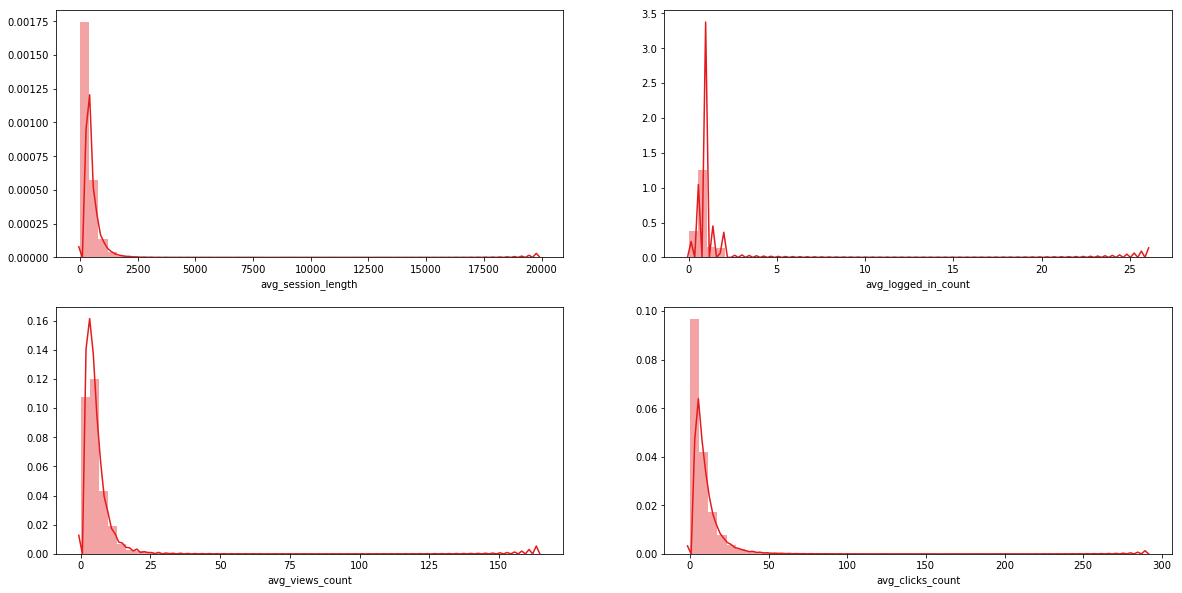

In [232]:
# plot distributions
fig, ax = plt.subplots(2, 2, figsize=(20,10))

sns.distplot(engage_df['avg_session_length'], ax=ax[0, 0])
sns.distplot(engage_df['avg_logged_in_count'], ax=ax[0, 1])
sns.distplot(engage_df['avg_views_count'], ax=ax[1, 0])
sns.distplot(engage_df['avg_clicks_count'], ax=ax[1, 1])


# trends are basically the same -- poisson dist
# why multiple logins in one session?

## 1 Clustering

In [233]:
# exclude user_id from input
engage_df2 = engage_df.iloc[:, 1:].copy()

# standardization
scl = StandardScaler().fit(engage_df2)
engage_df2[:] = scl.transform(engage_df2[:])
engage_df2.describe()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,285083.00000,285083.00000,285083.00000,285083.00000
mean,-0.00000,-0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000
min,-0.91759,-2.06166,-1.25949,-0.80090
25%,-0.51250,-0.54983,-0.55773,-0.65255
50%,-0.22713,0.15570,-0.32381,-0.26844
75%,0.22560,0.15570,0.29997,0.29778
max,49.34875,55.58958,37.10313,31.46419


In [234]:
engage_df2.head()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
0,0.86295,2.37305,-0.32381,-0.80090
1,0.98182,-2.06166,2.48321,-0.13334
2,-0.00287,-0.21386,0.84578,0.55275
3,1.52306,0.15570,0.61186,-0.07771
4,-0.66316,-0.28777,-0.23025,-0.26685


In [235]:
# choosing k: elbow method
distortions = []
K = range(1,11)
for k in K:
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=1).fit(engage_df2)
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
    distortions.append(interia)

k: 1  cost: 1140332.0
k: 2  cost: 774697.0630304102
k: 3  cost: 640335.2109659745
k: 4  cost: 548298.8018328942
k: 5  cost: 474592.88017731276
k: 6  cost: 407139.8480421999
k: 7  cost: 364378.8540599635
k: 8  cost: 325954.61141652585
k: 9  cost: 303741.90121658053
k: 10  cost: 283073.9508236672


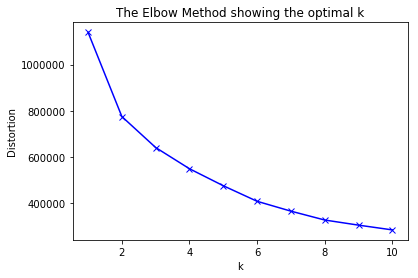

In [236]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

When K increases, the centroids are closer to the clusters centroids.

The improvements will decline, at some point rapidly, creating the elbow shape.

That point is the optimal value for K.

In [237]:
#Cluster the data
kmeans = KMeans(n_clusters=4, random_state=2019).fit(engage_df2) 
labels = kmeans.labels_

#Glue back to originaal data
engage_df2['cluster'] = labels
engage_df2.head()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,cluster
0,0.86295,2.37305,-0.32381,-0.80090,2
1,0.98182,-2.06166,2.48321,-0.13334,1
2,-0.00287,-0.21386,0.84578,0.55275,1
3,1.52306,0.15570,0.61186,-0.07771,1
4,-0.66316,-0.28777,-0.23025,-0.26685,2


In [238]:
# Aggregate by cluster
engage_df2_cluster = engage_df2.groupby(['cluster']).aggregate({'avg_session_length': 'mean',
                                                                'avg_logged_in_count': 'mean',
                                                                'avg_views_count': 'mean',
                                                                'avg_clicks_count': 'mean',
                                                                'cluster': 'count'
                                                                })

In [239]:
# rename count
engage_df2_cluster.rename(columns={'cluster':'counts'}, inplace=True)
#engage_df2_cluster.reset_index(inplace=True)
engage_df2_cluster

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,counts
cluster,,,,,
0,-0.45975,-1.23419,-0.55459,-0.47410,67269
1,0.59198,0.54496,0.90238,0.85383,59597
2,-0.14684,0.26103,-0.31371,-0.33056,149539
3,2.02876,1.32638,3.50758,3.50743,8678


### Plot clusters in 2d
PCA & tSNE

In [241]:
X = engage_df2.iloc[:,:4]
y = engage_df2.iloc[:,4]

In [242]:
X.head()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
0,0.86295,2.37305,-0.32381,-0.80090
1,0.98182,-2.06166,2.48321,-0.13334
2,-0.00287,-0.21386,0.84578,0.55275
3,1.52306,0.15570,0.61186,-0.07771
4,-0.66316,-0.28777,-0.23025,-0.26685


In [243]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [244]:
X_pca = pd.DataFrame(np.c_[X_r, engage_df2['cluster']], columns = ['pc1', 'pc2', 'cluster'])
X_pca['cluster'] = X_pca['cluster'].astype('int')

In [245]:
X_pca.head()

,pc1,pc2,cluster
0,0.65269,1.11454,2
1,0.96815,-2.06308,1
2,0.73162,-0.14935,1
3,0.99084,-0.93026,1
4,-0.66905,0.26492,2


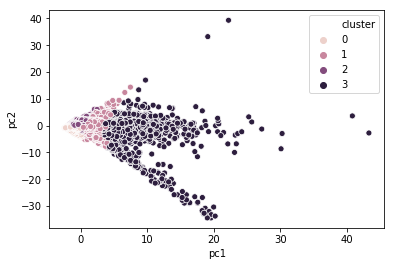

In [246]:
import seaborn as sns
sns.scatterplot(x=X_pca['pc1'], y= X_pca['pc2'], hue = X_pca['cluster'])

In [ ]:
# tsne: it's gonna take a long time
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=250)
X_r = tsne.fit_transform(X)
X_tsne = pd.DataFrame(np.c_[X_r, engage_df2['cluster'][], columns = ['pc1', 'pc2', 'cluster'])
X_tsne['cluster'] = X_tsne['cluster'].astype('int')

In [163]:
X_tsne.head()

,pc1,pc2,cluster
0,1.46753,3.17048,3
1,1.35031,-0.54758,3
2,-1.17538,-5.08038,3
3,0.35523,-0.19631,3
4,-0.41104,4.86498,1


In [ ]:
sns.scatterplot(x=X_tsne['pc1'], y= X_tsne['pc2'], hue = X_tsne['cluster'])

## Interpretations

In [250]:
df = engage_df2_cluster
df.head()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,counts
cluster,,,,,
0,-0.45975,-1.23419,-0.55459,-0.47410,67269
1,0.59198,0.54496,0.90238,0.85383,59597
2,-0.14684,0.26103,-0.31371,-0.33056,149539
3,2.02876,1.32638,3.50758,3.50743,8678


### Spider Plot

In [251]:
# minmax scaling so as all clusters is visible in the same plot
df_spider = df.iloc[:,1:-1]

scl = MinMaxScaler().fit(df_spider)
df_spider[:] = scl.transform(df_spider[:])
df_spider.describe()

,avg_logged_in_count,avg_views_count,avg_clicks_count
count,4.00000,4.00000,4.00000
mean,0.56969,0.35449,0.34239
std,0.41856,0.45808,0.46318
min,0.00000,0.00000,0.00000
25%,0.43796,0.04447,0.02704
50%,0.63938,0.20898,0.18479
75%,0.77112,0.51900,0.50014
max,1.00000,1.00000,1.00000


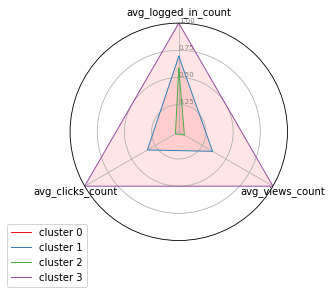

In [252]:
# exclude counts
# ------- PART 1: Create background

# number of variable
categories=list(df_spider)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.50,0.75,1.00], ["0.25","0.50","0.75","1.00"], color="grey", size=7)
plt.ylim(0,1)

 
# ------- PART 2: Add plots
for i in range(len(df_spider)):
    values=df_spider.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster "+str(i))
    ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('radar.png')

In [253]:
df_spider.head()

,avg_logged_in_count,avg_views_count,avg_clicks_count
cluster,,,
0,0.00000,0.00000,0.00000
1,0.69483,0.35867,0.33352
2,0.58394,0.05930,0.03605
3,1.00000,1.00000,1.00000


### Bar Plot

In [254]:
df_barplot = pd.melt(df.iloc[:,:-1].reset_index(), id_vars="cluster", var_name="metrice", value_name="value")

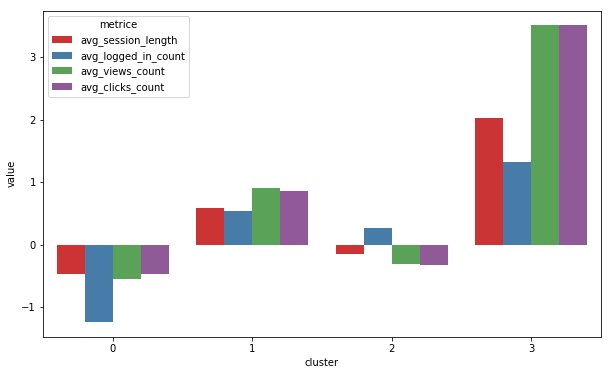

In [255]:
sns.set_palette('Set1')
plt.subplots(figsize=(10,6))
sns.barplot(x="cluster", y="value", hue="metrice", data=df_barplot)
plt.savefig('bar.png')

In [256]:
df.head()

,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,counts
cluster,,,,,
0,-0.45975,-1.23419,-0.55459,-0.47410,67269
1,0.59198,0.54496,0.90238,0.85383,59597
2,-0.14684,0.26103,-0.31371,-0.33056,149539
3,2.02876,1.32638,3.50758,3.50743,8678


most engaged users
login & logout immediately, explore site, apply for a card/loan, etc.

## 2 User Profile for each Cluster

In [115]:
# user and their corresponding clusters
engage_df['cluster'] = labels
engage_df.head()

,user_id,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,cluster
0,0000485dbdc19e76bedcaf155b4de9491f414a27,1,704.00000,2.00000,4.00000,0.00000,3
1,00008fb52ca81c6767db31f58ea37e7229c372e1,1,751.00000,0.00000,16.00000,6.00000,5
2,000091252c68230bd55a9abda98896c8610994bc,6,361.66667,0.83333,9.00000,12.16667,5
3,000091d428154729cbf338d4f51aa95af254d342,2,965.00000,1.00000,8.00000,6.50000,5
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,5,100.60000,0.80000,4.40000,4.80000,2


In [84]:
# import user profile data
userprofile_df = pd.read_csv("user_profile.csv")

/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
# join user profile and user_cluster(exclude outlier cluster)
result_col = ['user_id', 'gender', 'state', 'is_homeowner', 'credit_score_bucket', 'count_tradelines_open_collection_accounts', 'cluster']
result_df = pd.merge(engage_df.loc[engage_df['cluster'] != outlier_cluster_idx,:], userprofile_df, how='inner', on=['user_id'])[result_col]

# outlier excluded
result_df

,user_id,gender,state,is_homeowner,credit_score_bucket,count_tradelines_open_collection_accounts,cluster
0,0000485dbdc19e76bedcaf155b4de9491f414a27,Female,TX,False,"(520.0, 525.0]",5,3
1,00008fb52ca81c6767db31f58ea37e7229c372e1,Female,AZ,False,"(525.0, 530.0]",5,5
2,000091252c68230bd55a9abda98896c8610994bc,Male,CA,False,"(525.0, 530.0]",5,5
3,000091d428154729cbf338d4f51aa95af254d342,Unisex,CA,False,"(625.0, 630.0]",0,5
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,Female,GA,True,"(595.0, 600.0]",1,2
5,0000b68d91d518befd9d44c3217fd69f4e2fa66c,NaN,NJ,False,"(625.0, 630.0]",2,2
6,0000ebedec77fecfff9ba35b0acfbbb79bf35c9a,Female,OK,True,"(525.0, 530.0]",2,0
7,00010dae93e32f0b3da57378424885bb2de53711,NaN,WI,False,"(655.0, 660.0]",0,2
8,000120239e250b154ad041279d5234e5d8da01ab,Female,NC,True,"(635.0, 640.0]",6,0
9,00017b0c10f321b7b62775ef06422b53cd71fa7a,Female,OK,False,"(700.0, 705.0]",0,2


## Gender

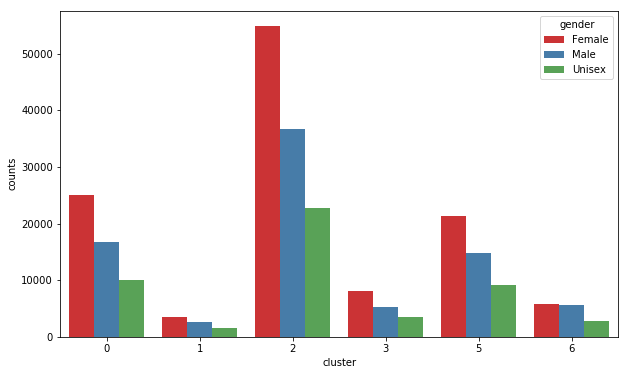

In [118]:
# Gender
plt.subplots(figsize=(10,6))
gender_grouped = result_df.groupby(['cluster', 'gender']).size().reset_index()
gender_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="gender", data=gender_grouped)

## State

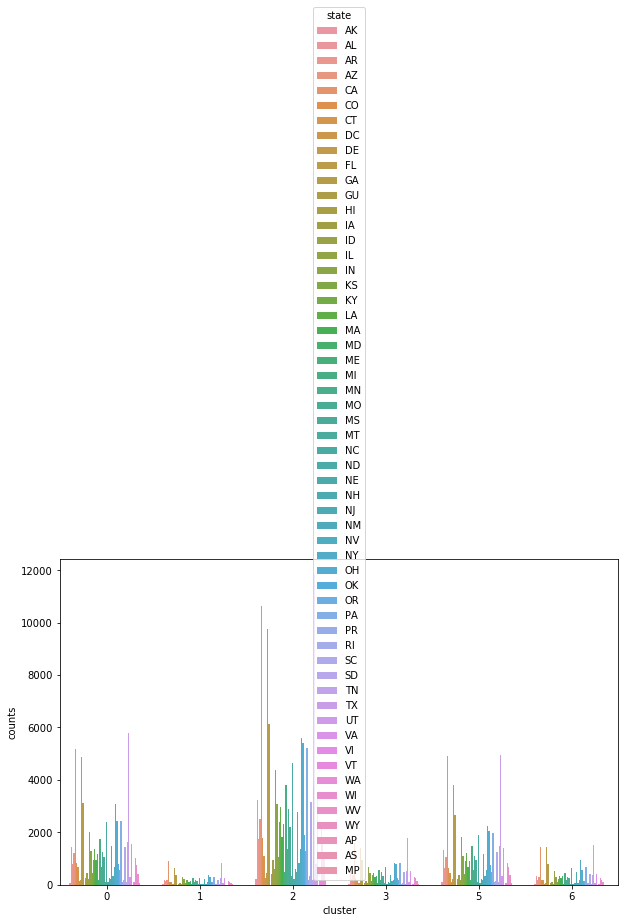

In [119]:
# State
plt.subplots(figsize=(10,6))
state_grouped = result_df.groupby(['cluster', 'state']).size().reset_index()
state_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue='state', data=state_grouped)

## Home Ownership

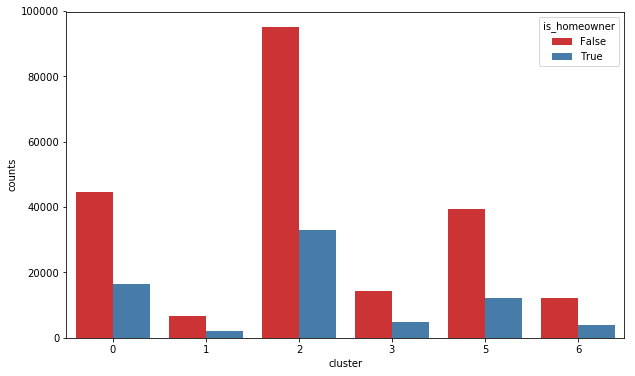

In [120]:
plt.subplots(figsize=(10,6))
ho_grouped = result_df.groupby(['cluster', 'is_homeowner']).size().reset_index()
ho_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="is_homeowner", data=ho_grouped)

## Credit Score 

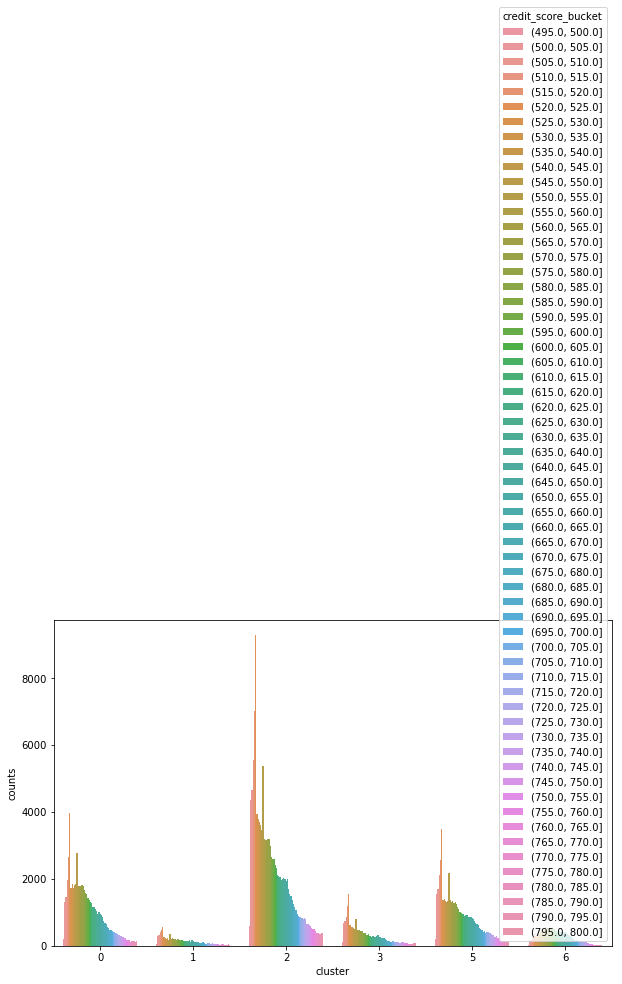

In [121]:
plt.subplots(figsize=(10,6))
credit_grouped = result_df.groupby(['cluster', 'credit_score_bucket']).size().reset_index()
credit_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="credit_score_bucket", data=credit_grouped)

## Collection Account

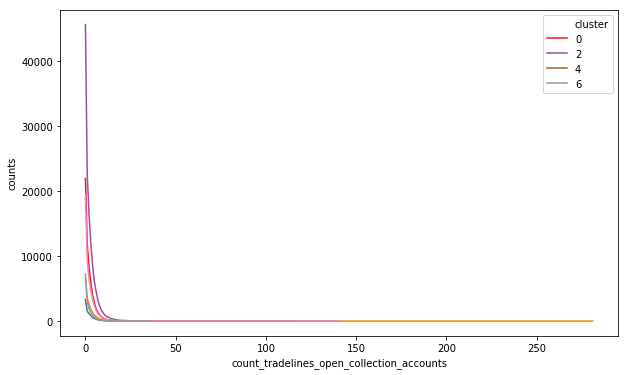

In [122]:
plt.subplots(figsize=(10,6))
clct_grouped = result_df.groupby(['cluster', 'count_tradelines_open_collection_accounts']).size().reset_index()
clct_grouped.rename(columns={0:'counts'}, inplace=True)
sns.lineplot(x="count_tradelines_open_collection_accounts", y="counts", hue="cluster", palette="Set1",data=clct_grouped)